# PA 2: Classification - Decision Tree

## Student Details
Student Name and ID:Diksha Sharma 1001679176


Notes: When submitting, fill your name and ID in this cell.  [1 point]


Do not to forget to cite any external sources used by you.

## Programming Assignment Submission Instructions


Step 1: Rename this submission file as 'yourLastName_Last4digitsofyourID_DT.ipynb' [1 point]

Step 2: Place this file inside the folder 'PA#2_Classification_yourLastName_Option2'  [1 point]


## Programming Assignment Details

This is an individual assignment. 

For this assignment use Jupyter notebook, Panda, and scikit.

- Load wine dataset from sklearn datasets.  [2 points]
- Create a dataframe and print the first and last five records of your dataset.  [2 points]
- Print the class names.  [2 points]
- Split your dataset 70% for training, and 30% for testing the classifier.  [2 points]
- Use gini and entropy to measure the quality of a split.  [5 points]
- Use comments to explain your code and variable names. [2 points]
- Calculate and print the confusion matrix, and the classification Report (includes: precision, recall, f1-score, and support).  [5 points]
- Print the decision tree visualization.  [5 points]

## Report

For each classification task you need to submit a report (Microsoft Word, or PDF) that you have to:
- describe the Decision Tree method,  [5 points]
- the dataset and if you have done any pre-process, and [5 points]
- your code. [2 points]
- Visualization of the decision tree for gini and entropy.[8 points]
- Interpret your results, and do not forget to compare gini and entropy [10 points]

Do not to forget to cite your sources!


Step 3: Save your report file as 'yourLastName_Last4digitsofyourID_DT.doc'  [1 point]

Step 4: Place this file inside the folder 'PA#2_Classification_yourLastName_Option2'  [1 point]

# - - - - - - - - - - - - - - - Solution - - - - - - - - - - - - - - - - - - 

In [1]:
#------import of the libraries required for the execution of the required codes in the assignment-----
import pandas as pd
import graphviz
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import collections

In [2]:
#-----Load wine dataset from sklearn datasets-----
wine_dataset=load_wine()
#print(wine_dataset['DESCR'])
#-----Create a dataframe after processing the data as the datset is in the form of a bunch-----
wine_df=pd.DataFrame(data=wine_dataset.data,columns=wine_dataset.feature_names)
wine_df['target']=wine_dataset.target
wine_df['class']=wine_df['target'].map(lambda index: wine_dataset['target_names'][index])
#------print the first five values of the dataset------
print("                                The first five values of the dataset")
wine_df.head()

                                The first five values of the dataset


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0


In [3]:
#-----print the last five values of the dataset-----
print("                                The last five values of the dataset")
wine_df.tail()

                                The last five values of the dataset


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,class
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,2,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,2,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,2,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,2,class_2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,2,class_2


In [4]:
#------Extracting the class names and printing them------
class_names=wine_dataset.target_names
print(class_names)

['class_0' 'class_1' 'class_2']


In [5]:
#-------Training and testing the data--------- 
X_train, X_test, y_train, y_test = train_test_split(wine_dataset.data,wine_dataset.target, test_size = 0.3)


In [6]:
#Gini to measure the quality of split using DecisionTreeClassifier
best_split_gini=tree.DecisionTreeClassifier(criterion='gini')
#fit the classifier in the model
best_split_gini.fit(X_train,y_train)
print(best_split_gini)
#Entropy to measure the quality of split using DecisionTreeClassifier
best_split_entropy=tree.DecisionTreeClassifier(criterion='entropy')
best_split_entropy.fit(X_train,y_train)
print(best_split_entropy)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [7]:
#-------Use the predictions to create a confusion matrix and a classification report for gini-----
y_pred=best_split_gini.predict(X_test)
#-------Create a confusion matrix and classification report using the true and the predicted values-------
cm=confusion_matrix(y_test,y_pred)
cl_report=classification_report(y_test,y_pred)
print("Confusion Matrix is as follows\n\n",cm)
print("\n\n")     
print("Classification Report is as follows\n\n",cl_report)

Confusion Matrix is as follows

 [[19  0  0]
 [ 0 22  0]
 [ 0  1 12]]



Classification Report is as follows

              precision    recall  f1-score   support

          0       1.00      1.00      1.00        19
          1       0.96      1.00      0.98        22
          2       1.00      0.92      0.96        13

avg / total       0.98      0.98      0.98        54



In [8]:
#-------Use the predictions to create a confusion matrix and a classification report for entropy-----
pred=best_split_entropy.predict(X_test)
#-------Create a confusion matrix and classification report using the true and the predicted values-------
cm=confusion_matrix(y_test,pred)
cl_report=classification_report(y_test,pred)
print("Confusion Matrix is as follows\n\n",cm)
print("\n\n")     
print("Classification Report is as follows\n\n",cl_report)

Confusion Matrix is as follows

 [[19  0  0]
 [ 0 22  0]
 [ 0  1 12]]



Classification Report is as follows

              precision    recall  f1-score   support

          0       1.00      1.00      1.00        19
          1       0.96      1.00      0.98        22
          2       1.00      0.92      0.96        13

avg / total       0.98      0.98      0.98        54



           Decision Tree Using Gini as a Criterion          


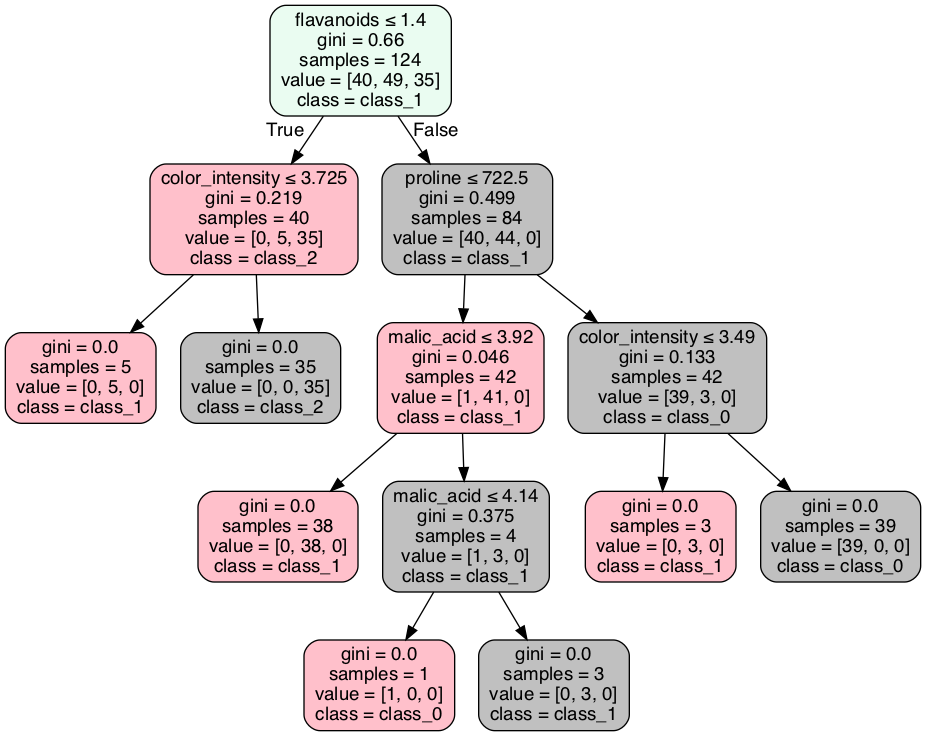

In [9]:
print("           Decision Tree Using Gini as a Criterion          ")
#-------Reading the strings as files and assigning it to a variable------
decision_tree_data=StringIO()
#------using graphviz to visualise the decision tree------
decision_tree_v=tree.export_graphviz(best_split_gini,out_file=decision_tree_data,feature_names=wine_dataset.feature_names,class_names=wine_dataset.target_names,filled=True, rounded=True,special_characters=True)
dtree= pydotplus.graph_from_dot_data(decision_tree_data.getvalue())
colors = ('pink', 'grey')
edges = collections.defaultdict(list)
#-----formatting of the decision tree colors----
for edge in dtree.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = dtree.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])
Image(dtree.create_png())


           Decision Tree Using Entropy as a Criterion          


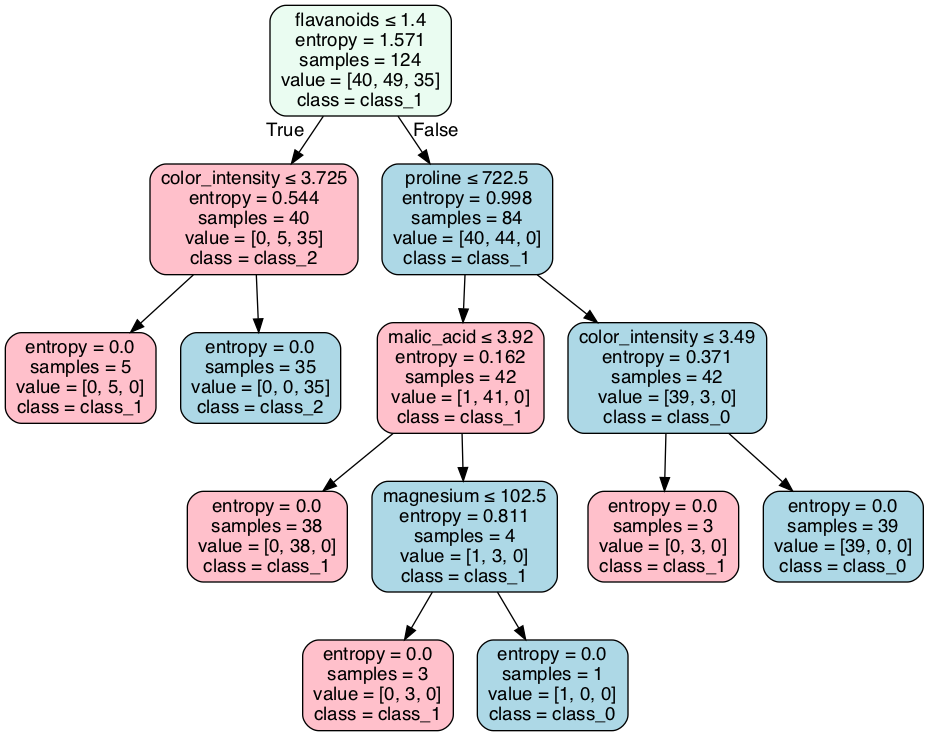

In [10]:
print("           Decision Tree Using Entropy as a Criterion          ")
#-------Reading the strings as files and assigning it to a variable------
decision_tree_data=StringIO()
decision_tree_v=tree.export_graphviz(best_split_entropy,out_file=decision_tree_data,feature_names=wine_dataset.feature_names,class_names=wine_dataset.target_names,filled=True, rounded=True,special_characters=True)
dtree= pydotplus.graph_from_dot_data(decision_tree_data.getvalue())
colors = ('pink', 'lightblue')
edges = collections.defaultdict(list)

for edge in dtree.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = dtree.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])
Image(dtree.create_png())

# REFERENCES
http://scikit-learn.org/stable/modules/tree.html<br>
http://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html<br>
http://dataaspirant.com/2017/02/01/decision-tree-algorithm-python-with-scikit-learn/